# *Mnist Autoencoder* 

## *Importing the libraries*

In [117]:
import tensorflow as tf
import tensorflow.keras as ks
import matplotlib.pyplot as plt
import numpy as np
import pickle

## *unpickling the data from the file*

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dicty = pickle.load(fo, encoding='bytes')
    return dicty

qmnist = unpickle("../input/qmnist-the-extended-mnist-dataset-120k-images/MNIST-120k")

## *After extraction we get the label and the pixel data's of all 120k images*

In [4]:
data = qmnist['data']
labels = qmnist['labels']


### *Lets visualize a single image to confirm that the image is a mnist*

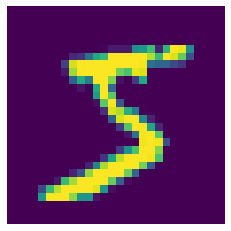

In [8]:
img = plt.imshow(data[0])
plt.axis('off')
plt.show()

## *The extracted data consist of about 120000 28x28 images* 

In [23]:
data.shape

(120000, 28, 28)

## *prepare the data for autoencoding where we do not need their labels. so we just preprocess the image alone by normalizing and reshaping it to a single dimension*

In [85]:
def map_image(image):
    image = image / 255.0
    image = tf.reshape(image, shape=(784, ))
    return image

new_x = map(map_image, data)

In [90]:
new_x = np.array(new_x)

## *here a simple autoencoder is built with only two layers,  one for encoding and one for decoding . we train the model by keeping both x and y as new_x which is the preprocessed image*

In [92]:
def simple_autoencoder(inputs):
    encoder = ks.layers.Dense(units=32, activation='relu')(inputs)
    decoder = ks.layers.Dense(units=784, activation='sigmoid')(encoder)
    
    return encoder, decoder

inputs = ks.layers.Input(shape=(784, ))

encoder_output, decoder_output = simple_autoencoder(inputs)

encoder_model = ks.Model(inputs=inputs, outputs=encoder_output)
autoencoder_model = ks.Model(inputs=inputs, outputs=decoder_output)

autoencoder_model.compile(optimizer = ks.optimizers.Adam(), loss='binary_crossentropy')


batch_size = 128
train_steps = 120000 // batch_size

autoencoder_history = autoencoder_model.fit(x=new_x[:110000],y=new_x[:110000], steps_per_epoch=train_steps, epochs=50, verbose=0)

## *After 50 epochs the autoencoder model has trained better which we can judge by looking at its loss value*

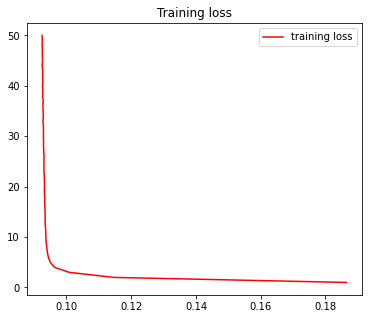

In [101]:
loss = autoencoder_history.history['loss']

plt.figure(figsize=(6, 5))
plt.plot(loss, range(1,51), color='red',label='training loss')
plt.title('Training loss')
plt.legend()
plt.show()

## *Its time for evaluating the model with visuals*

In [115]:
def display_one_row(disp_images, offset, shape=(28, 28)):
    for idx, test_image in enumerate(disp_images):
        plt.subplot(3, 10, offset + idx + 1)
        plt.xticks([])
        plt.yticks([])
        test_img = np.reshape(test_image, shape)
        plt.imshow(test_img, cmap='gray')
        
def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8, 4)):
    plt.figure(figsize=(15, 5))
    display_one_row(disp_input_images, 0, shape=(28, 28))
    display_one_row(disp_encoded, 10, shape=enc_shape)
    display_one_row(disp_predicted, 20, shape=(28, 28))
        

## *Below you can visualize the input image to the model -> encoded image -> decoded image*

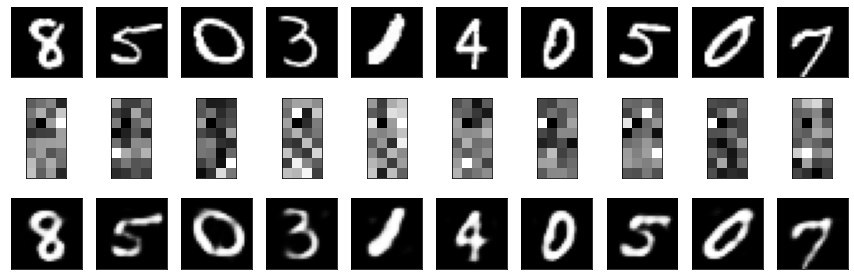

In [116]:
test_images = new_x[110000:]
output_samples = test_images

encoded_predicted = encoder_model.predict(test_images)
decoded_predicted = autoencoder_model.predict(test_images)

display_results(output_samples[:10], encoded_predicted[:10], decoded_predicted[:10])
    